In [52]:
progs = read.csv("output/progtovec.csv")
progs[is.na(progs)] <- 0

In [2]:
meta_info <- progs[,1:3]
progs  <- progs[,-(1:3)]

In [4]:
ord    <- order(colnames(progs))
progs  <- progs[,ord]

In [5]:
class(progs[,2])

[1] "numeric"

In [70]:
which(apply(progs,2,is.numeric))

named integer(0)

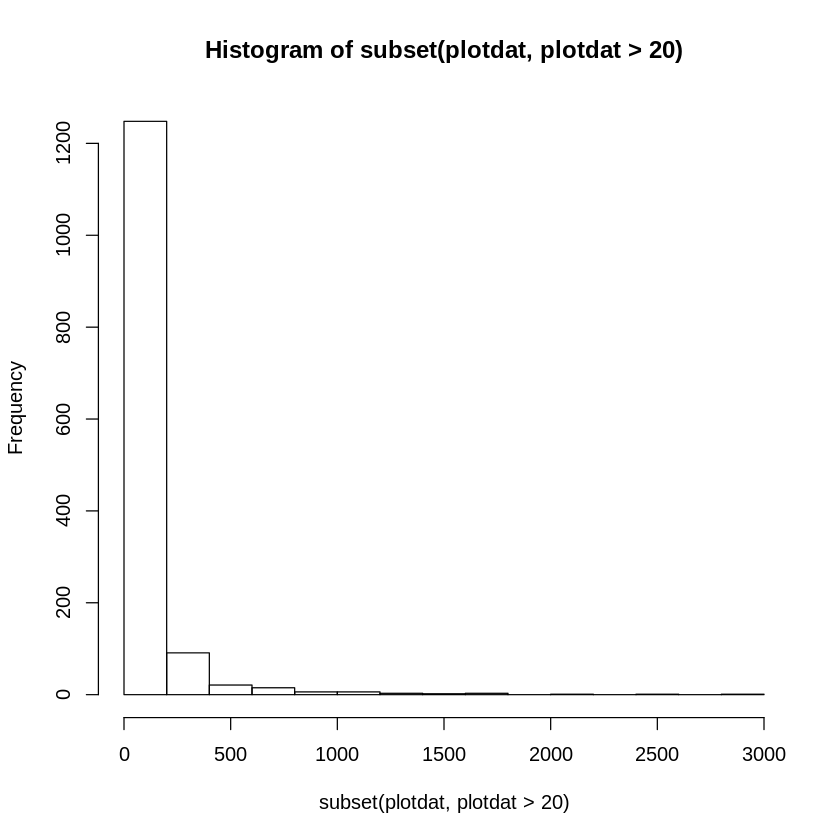

In [6]:
plotdat <- apply(progs,2,sum)
# plotdat <- plotdat[plotdat<100]
# hist(plotdat, breaks = c(seq(0,length(plotdat),10)))
hist(subset(plotdat, plotdat > 20))


In [7]:
tres  <- quantile(apply(progs,2,sum),.90)
tres

90% 
 23

In [8]:
progs <- progs[,apply(progs,2,sum) > 25]
progs

absence,abuse,abyss,act,action,adrenaline,afraid,afterlife,age,aggression,⋯,wreck,wretched,wrong,year,yesterday,yet,young,youth,zombie,zone
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [39]:
dim(progs)

[1] 3411 1175

In [7]:
library("psych")
fit <- fa(progs,10)
summary(fit)

Loading required namespace: GPArotation
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“I am sorry, to do these rotations requires the GPArotation package to be installed”


Factor analysis with Call: fa(r = progs, nfactors = 10)

Test of the hypothesis that 10 factors are sufficient.
The degrees of freedom for the model is 54275  and the objective function was  177.11 
The number of observations was  721  with Chi Square =  106117.4  with prob <  0 

The root mean square of the residuals (RMSA) is  0.04 
The df corrected root mean square of the residuals is  0.04 

Tucker Lewis Index of factoring reliability =  0.155
RMSEA index =  0.043  and the 10 % confidence intervals are  0.036 NA
BIC =  -251046.8

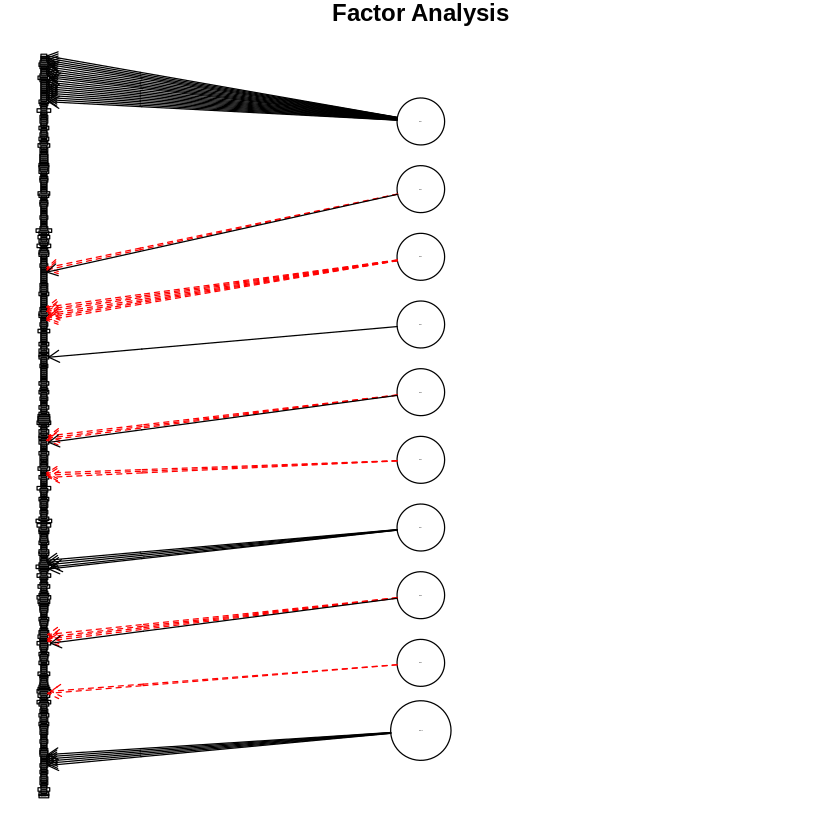

In [8]:
fa.diagram(fit)

In [9]:
print(fit,cut=.3,digits=3)

Factor Analysis using method =  minres
Call: fa(r = progs, nfactors = 10)
Standardized loadings (pattern matrix) based upon correlation matrix
              MR1    MR2    MR3    MR4    MR5    MR6    MR7    MR8    MR9
afraid                                                                   
ago                                                                      
ahead                                                                    
air                                                                      
alive       0.329                                                        
alone                                                                    
always                                                0.336              
america                                                                  
angel                                                                    
answer      0.379 -0.312                                                 
anymore                                    

In [10]:
words <- names(fit$communality)[fit$communality > .10]

In [11]:
length(words)

[1] 136

In [12]:
library("psych")
progs_filtered <- progs[,colnames(progs) %in% words]
fit.filtered   <- fa(progs_filtered,10)
summary(fit.filtered)

Loading required namespace: GPArotation
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“I am sorry, to do these rotations requires the GPArotation package to be installed”


Factor analysis with Call: fa(r = progs_filtered, nfactors = 10)

Test of the hypothesis that 10 factors are sufficient.
The degrees of freedom for the model is 7865  and the objective function was  26.8 
The number of observations was  721  with Chi Square =  17880.91  with prob <  0 

The root mean square of the residuals (RMSA) is  0.04 
The df corrected root mean square of the residuals is  0.04 

Tucker Lewis Index of factoring reliability =  0.517
RMSEA index =  0.045  and the 10 % confidence intervals are  0.041 NA
BIC =  -33875.82

In [13]:
dim(progs_filtered)

[1] 721 136

In [14]:
print(fit.filtered,cut=.3,digit=3)

Factor Analysis using method =  minres
Call: fa(r = progs_filtered, nfactors = 10)
Standardized loadings (pattern matrix) based upon correlation matrix
            MR1    MR2    MR3    MR4    MR5    MR6    MR7    MR8    MR9   MR10
afraid                                                                        
air                                                                           
alive     0.337                                                               
alone                                                                         
always                                       0.464                            
answer    0.402 -0.317                                                        
ash                                                                           
away      0.382                                                               
baby                                                                          
back                                                      

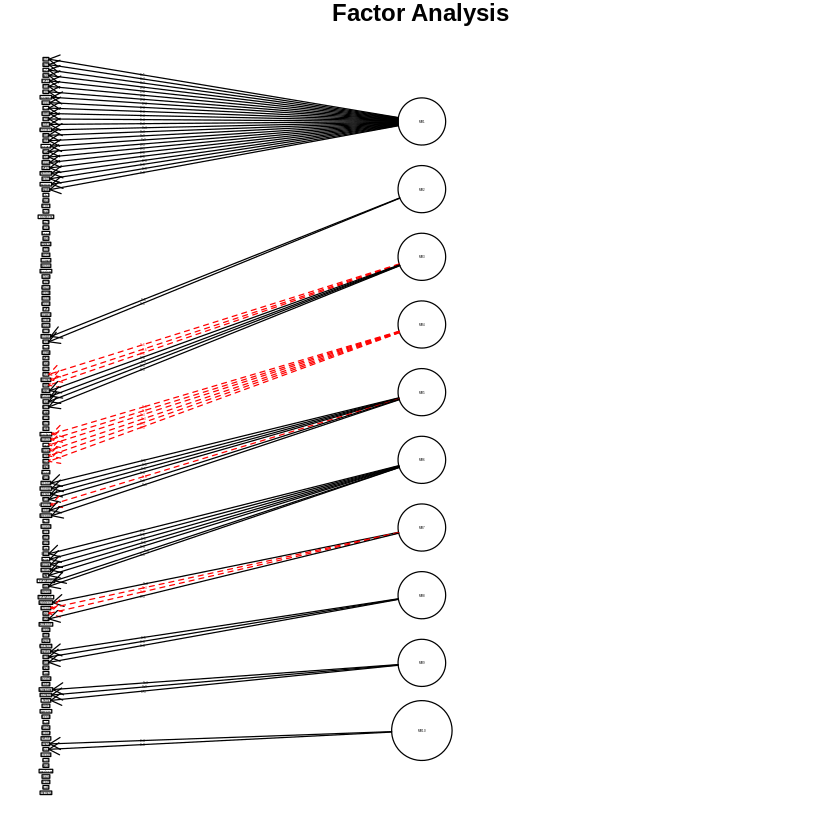

In [15]:
fa.diagram(fit.filtered)

In [16]:
words <- names(fit.filtered$communality)[fit.filtered$communality > .10]

In [17]:
words <- rownames(fit.filtered$loadings)

In [18]:
ind   <- apply(fit.filtered$loadings>.3,1,sum) != 0
words <- rownames(fit.filtered$loadings)[ind]

In [19]:
library("psych")
progs_filtered <- progs[,colnames(progs) %in% words]
fit.filtered   <- fa(progs_filtered,10)
summary(fit.filtered)

Loading required namespace: GPArotation
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“I am sorry, to do these rotations requires the GPArotation package to be installed”


Factor analysis with Call: fa(r = progs_filtered, nfactors = 10)

Test of the hypothesis that 10 factors are sufficient.
The degrees of freedom for the model is 1166  and the objective function was  3.78 
The number of observations was  721  with Chi Square =  2619.44  with prob <  2.8e-113 

The root mean square of the residuals (RMSA) is  0.03 
The df corrected root mean square of the residuals is  0.04 

Tucker Lewis Index of factoring reliability =  0.816
RMSEA index =  0.043  and the 10 % confidence intervals are  0.039 0.044
BIC =  -5053.58

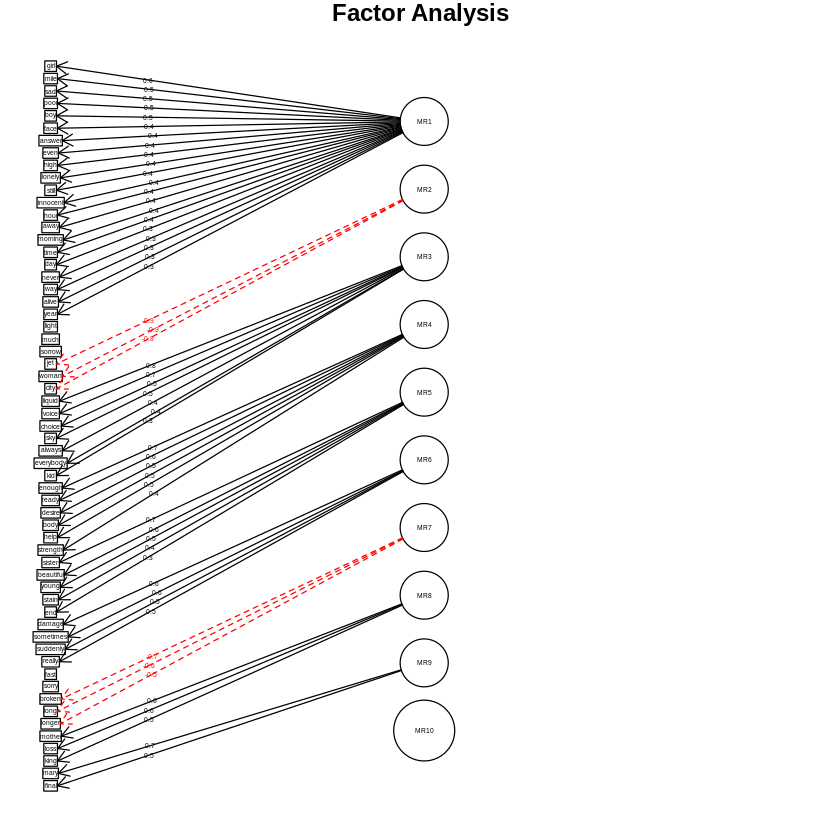

In [20]:
fa.diagram(fit.filtered)

## TFIDF

In [1]:
progs = read.csv("output/progtovec.csv")
progs[is.na(progs)] <- 0

In [2]:
meta_info <- progs[,1:3]
progs  <- progs[,-(1:3)]

In [3]:
ord    <- order(colnames(progs))
progs  <- progs[,ord]

In [4]:
progs.bak <- progs

In [5]:
tfidf <- function(dat){
    D <- nrow(progs)
    docfreqs <- apply(progs,2,sum)
    progs * log2(D/docfreqs)}
progs.tfidf <- tfidf(progs)

In [6]:
progs.tfidf[progs.tfidf==0] <- NA

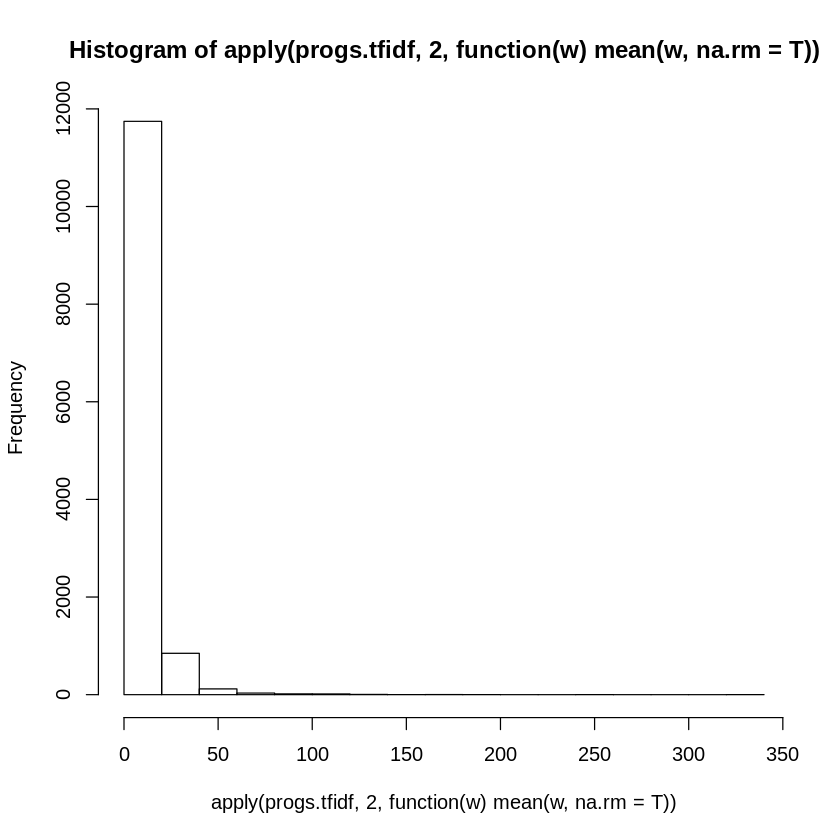

In [7]:
hist(apply(progs.tfidf,2,function(w) mean(w,na.rm=T)))

In [8]:
ind <- apply(progs.tfidf,2,function(w) mean(w,na.rm=T))

In [9]:
ind <- ind > 30

In [10]:
progs.tfidf.processed <- progs.tfidf[,ind]
save(progs.tfidf.processed, file="output/metal.tfidf.processed")

In [1]:
metal.tfidf <- get(load("output/metal.tfidf.processed"))

In [3]:
dim(metal.tfidf)

[1] 3411  373

In [4]:
library("psych")
fit <- fa(metal.tfidf,10)
print(fit,cut = .3, digits = 3)

Warning message in cor(r, use = use):
“the standard deviation is zero”

In [35]:
# rownames(fit$loadings)
words <- rownames(fit$loadings)[apply(fit$loadings >= .3,1,sum) != 0]

In [47]:
fit.filtered <- fa(progs.tfidf[,colnames(progs) %in% words],9)

Loading required namespace: GPArotation
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“I am sorry, to do these rotations requires the GPArotation package to be installed”

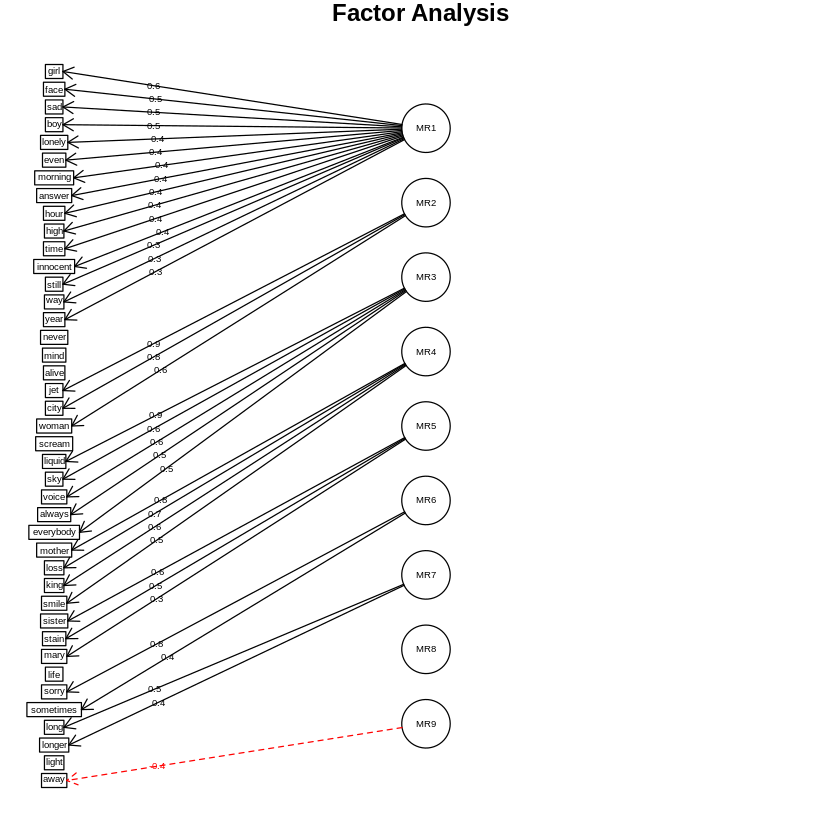

In [48]:
fa.diagram(fit.filtered)

In [50]:
print(fit.filtered,cut = .3, digits = 3)

Factor Analysis using method =  minres
Call: fa(r = progs.tfidf[, colnames(progs) %in% words], nfactors = 9)
Standardized loadings (pattern matrix) based upon correlation matrix
             MR1    MR2    MR3    MR4    MR5    MR6    MR7    MR8    MR9    h2
alive                                                                    0.122
always                   0.522                                           0.385
answer     0.410                                                         0.251
away       0.366                                                  -0.390 0.324
boy        0.452                                                         0.288
city       0.350  0.797                                                  0.780
even       0.422                                                         0.284
everybody                0.468                                           0.245
face       0.533                                                         0.444
girl       0.580                